<a href="https://colab.research.google.com/github/KyleEtera/MAT422/blob/main/1_2_Elements_of_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import sympy

**1.2.1 Linear Spaces** - A set of vectors, which are matrices of only one row or column. These vectors can be added together, multiplied by scalars, or both, forming a linear combination. Matrix addition can only be done on matrices of the same number of rows and columns.

A transpose is a helpful tool to flip a matrix from rowXcolumn to columnXrow.

**Linear Subspace** - A subset, B, of a Linear Space, A, that all scalar multiplications of a vector in the subspace are also in B, and all vector additions in the subspace are also in B. This includes the zero vector, v_0.

In [125]:
# Define row, column, and zero vector for future use
row_matrix = np.array([2,3])
column_matrix = np.array([[3],[4]])
v_0 = np.zeros([3, 1])
print("Starting Vectors")
print(column_matrix, "\t", row_matrix, "\n")
print(v_0, "\n")

# Scalar Multiplication
print("Scalar Multiplication")
scalar_row_mult = 2 * row_matrix
scalar_col_mult = 2 * column_matrix
print(scalar_col_mult, "\t", scalar_row_mult, "\n")

# Matrix Addition
print("Matrix Addition")
matrix_add = row_matrix + column_matrix.T
print(matrix_add, "\n")

Starting Vectors
[[3]
 [4]] 	 [2 3] 

[[0.]
 [0.]
 [0.]] 

Scalar Multiplication
[[6]
 [8]] 	 [4 6] 

Matrix Addition
[[5 7]] 



**Span** - The set of all linear combinations of the vectors in a Linear Space, V. This also makes the Span a Linear Subspace.


**Linear Independence** - Vectors from the same Vector Space are linearly independent if the equation:

a1 * v1 + a2 * v2 + ... + an * vn = 0_v

Can only be solved with ai = 0 for i = 1, 2, ..., n, where v_0 is the zero vector.

In [124]:
# Create three example column vectors to show linear independence
v_A = np.array([[3], [5], [9]])
v_B = np.array([[1], [2], [3]])
v_C = np.array([[2], [2], [2]])

# Let us try to find a scalar a and b that satisfies v_0 = a*v_A + b*v_B + c*v_b
# This can be done through taking the RREF of the combined Matrix AB
v_AB = np.array([[3, 1, 2], [5, 2, 2], [9, 3, 2]])
AB_rref = sympy.Matrix(v_AB).rref()
print(AB_rref, "\n")

(Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]), (0, 1, 2)) 



Since we get the result of a 3x3 matrix with 1's in all diagonals, we know that each each vector is independent and cannot be a linear combination of the other vectors. This 3x3 matrix is known as an identity matrix. Otherwise this would have been called linearly dependent.

**1.2.2 Orthagonality** - A set of vectors are orthogonal to each other when their dot product, or inner product, is 0.

**Orthonormality** - This set of vectors is also orthonormal if their norm is 1.

In [129]:
# Let's redefine some vectors
v_A = np.array([[3], [5], [9]])
v_B = np.array([[1], [3], [-2]])

# We can find the dot product by summing the result of
# multiplying each term of vector A with vector B
print("The Dot Product is:")
print(v_A[0] * v_B[0] + v_A[1] * v_B[1] + v_A[2] * v_B[2])

# From here on we shall just use np.dot and transposing one array
print(np.dot(v_A.T, v_B), "\n")

# We can find the norm of a vector by
# taking the square root of the sum of each term squared
print("The Norm of v_A and v_B are:")
print(np.sqrt(np.sum(v_A * v_A)))
print(np.sqrt(np.sum(v_B * v_B)), "\n")

# From here on we shall just use np.linalg.norm
print(np.linalg.norm(v_A))
print(np.linalg.norm(v_B), "\n")

The Dot Product is:
[0]
[[0]] 

The Norm of v_A and v_B are:
10.723805294763608
3.7416573867739413 

10.723805294763608
3.7416573867739413 



**Orthonormal Basis Expansion** - We can find a vector by summing the dot product of it and the orthonormal basis of a subspace times the orthonormal basis again.

**Best Approximation Theorem** - Suppose we want to find the closest vector, v*, to the vector, v, not in the linear subspace, U, that is normed. We can find this vector by finding a vector that makes a right angle with a vector, u1, spanning the subspace, U, which is in a linear space V.

**Orthogonal Projection** - The orthogonal projection of v onto U in V on U is the projection of v onto U is equal to the sum of the dot products between v and the orthonormal basis of U times q. That is, the Orthonormal Basis Expansion.

This allows the dot product of v minus the projection of v onto U to be less than or equal to the dot product of v minus any vector, u, inside U.

**Cauchy-Swartz** - The inner product of two vectors, u and v, in the linear space V is less than or equal to the multiplication of the two individual inner products.

**Orthogonal Decomposition** - For any vector, u, in a linear subspace, U, of a linear space, V, with orthonormal basis q1,...,qm, with v in V, the inner product of v minus the projection of v onto U with u equals 0.

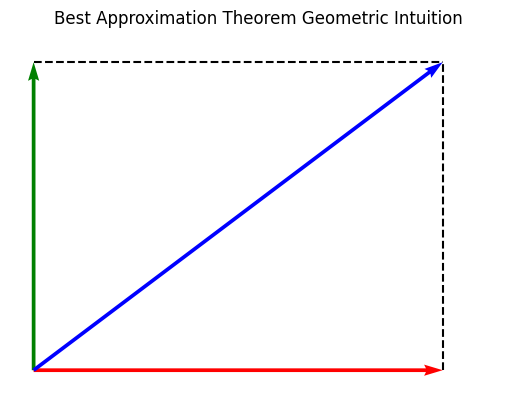


Check orthoganality
 0 
Check equality
 [1.73205081 0.        ]  =  [1.73205081 0.        ]

That is: v* = <u1, v>u1, the orthonormal basis expansion


In [130]:
v = np.array([np.sqrt(3),1])
v_star = np.array([np.sqrt(3),0])
v_minus_v_star = np.array([0,1])
approx_v = np.array([v_star,v_minus_v_star,v])
u_1 = np.array([1,0])

origin = np.array([[0, 0, 0],[0, 0, 0]])
plt.xlim(-0.1, 2)
plt.ylim(-0.1, 1.1)
plt.quiver(*origin, approx_v[:,0], approx_v[:,1], color=['r','g','b'], angles='xy', scale_units='xy', scale=1)
plt.title("Best Approximation Theorem Geometric Intuition")
plt.vlines(np.sqrt(3), 0, 1, linestyle="dashed", color="k")
plt.hlines(1, 0, np.sqrt(3), linestyle="dashed", color="k")
plt.axis('off')
plt.show()

print("\nCheck orthoganality\n", u_1 @ v_minus_v_star, "\nCheck equality\n", v_star, " = ", u_1 @ v * u_1)
print("\nThat is: v* = <u1, v>u1, the orthonormal basis expansion")

**1.2.3 Gram-Schmidt Process** - An algorithm used to obtain an orthonormal basis from the set of linearly independent vectors that span a linear space using orthogonal projection properties. This creates a basis spanning the same subspace with orthogonality ensured by orthogonal decomposition.

Because this examples only has one column, we only need 1 'loop'. Generally you would loop through all columns, subtracting the previous column's projection before dividing by the norm.

In [121]:
# Taking from 1.2.2 Orthagonality and Orthonormality examples,
# we can recall that v_A and v_B were not orthonormal
print("Orthonormalized")
ON_v_A = v_A / np.linalg.norm(v_A)
ON_v_B = v_B / np.linalg.norm(v_B)
print(ON_v_A)
print(np.linalg.norm(ON_v_A), "\n")
print(ON_v_B)
print(np.linalg.norm(ON_v_B), "\n")

# Lets verify the dot product is still 0
print(np.dot(ON_v_A.T, ON_v_B))

print("\nProjection of v1 onto U")
v_1 = np.array([2, 2, 2])
proj_v_U = np.dot(v_1, ON_v_A) * ON_v_A + np.dot(v_1, ON_v_B) * ON_v_B
print(proj_v_U)

b_1 = v_1 - proj_v_U
q_1 = b_1 / np.linalg.norm(b_1)
print(b_1, "\n", q_1)

Orthonormalized
[[0.27975144]
 [0.4662524 ]
 [0.83925433]]
1.0 

[[ 0.26726124]
 [ 0.80178373]
 [-0.53452248]]
1.0 

[[0.]]

Projection of v1 onto U
[[1.17267081]
 [2.33540373]
 [2.08944099]]
[[ 0.82732919  0.82732919  0.82732919]
 [-0.33540373 -0.33540373 -0.33540373]
 [-0.08944099 -0.08944099 -0.08944099]] 
 [[ 0.53238788  0.53238788  0.53238788]
 [-0.21583292 -0.21583292 -0.21583292]
 [-0.05755545 -0.05755545 -0.05755545]]


**Eigenvalues and Eigenvectors** - Given a square matrix, A, there is an eigenvalue, lambda, of A if there exists a nonzero vector called the eigenvector, x, such that

A * x = lambda * x.


**Spectral Theorem for Symmetric Matrices** - For an nxn symmetric matrix A:


* A has n real eigenvalues, counting multiplicities
* If lambda is an eigenvalue of A with multiplicity k, then the eigenspace for lamda is k-dimensional
* The eigenspaces or mutually orthogonal, in the sense that eigenvectors corresponding to different eigenvalues are orthogonal
* A is orthogonally diagonizable

In [120]:
# Lets create two new matrices to use for these examples
m_A = np.array([[3, 4], [6, 1]])
m_B = np.array([[1, 3], [3, 1]])
e_val, e_vect = np.linalg.eig(m_A)
print("Both A and B will have 2 real, 1-dimensional eigenvalues each")
print("\nMatrix A: Square, Non-Symmetric")
print(e_val)
print(e_vect)
print("These eigenvectors are not orthogonal since this is non-symmetric: \n", np.dot(e_vect[1], e_vect[0]))

print("\nVerify A * x = lamda * x")
print(m_A @ e_vect)
print(e_vect * e_val)

e_val, e_vect = np.linalg.eig(m_B)
print("\nMatrix B: Square, Symmetric")
print(e_val)
print(e_vect)
print("These eigenvectors are orthogonal since this is symmetric: \n",np.dot(e_vect[1], e_vect[0]))

print("\nVerify A * x = lamda * x")
print(m_B @ e_vect)
print(e_vect * e_val)

Both A and B will have 2 real, 1-dimensional eigenvalues each

Matrix A: Square, Non-Symmetric
[ 7. -3.]
[[ 0.70710678 -0.5547002 ]
 [ 0.70710678  0.83205029]]
These eigenvectors are not orthogonal since this is non-symmetric: 
 0.038461538461538214

Verify A * x = lamda * x
[[ 4.94974747  1.66410059]
 [ 4.94974747 -2.49615088]]
[[ 4.94974747  1.66410059]
 [ 4.94974747 -2.49615088]]

Matrix B: Square, Symmetric
[ 4. -2.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
These eigenvectors are orthogonal since this is symmetric: 
 0.0

Verify A * x = lamda * x
[[ 2.82842712  1.41421356]
 [ 2.82842712 -1.41421356]]
[[ 2.82842712  1.41421356]
 [ 2.82842712 -1.41421356]]
